### ***Polinomsal Regresyon (Polynomial Regression)***
#### **Polinomsal Regresiyon Nedir?**
● Değişkenler arasındaki ilişki doğrusal olmadığı durumlarda başvurulan analiz metodudur.

#### Doğrusal Regresyon (Simple Linear Regression) 
$$
y = b_0 + b_1 x
$$

#### Çoklu Doğrusal Regresyon (Multiple Linear Regression)
$$
y = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n
$$

#### Polinomsal Regresyon (Polynomial Regression)
$$
y = b_0 + b_1 x + b_2 x^2 + b_3 x^3 + \dots + b_d x^d
$$

● Eğer doğrusal olmayan bir veri setine doğrusal regresyon uygularsak, iyi bir sonuç elde edemeyiz. Bu nedenle doğrusal olmayan veriseti üzerine polinomsal regresyon uygulamak daha iyi sonuç verecektir.

### ***Polinomsal Regresyon Modeli Eğitimi ve Testi***
● Bu bölümde Polinomsal Regresyon modelini eğitimini ve testlerini gerçekleştireceğiz.

In [1]:
# Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn
from sklearn.linear_model import LinearRegression # Doğrusal
from sklearn.preprocessing import PolynomialFeatures # Polinomsal

In [2]:
df = pd.read_csv("Downloads/polinomsal_regresyon_veriseti.csv", sep = ';')
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [3]:
# sklearn input olarak genelde numpy kabul eder
y = df.araba_max_hiz.values.reshape(-1,1) # numpy array
x = df.araba_fiyat.values.reshape(-1,1) # numpy array

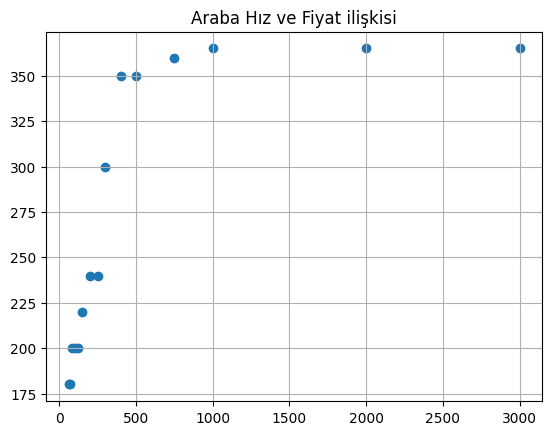

In [4]:
# veriyi görselleitir
plt.scatter(x, y)
plt.xlable = ("Hız")
plt.ylable = ("Fiyat")
plt.title("Araba Hız ve Fiyat ilişkisi")
plt.grid(True)
plt.show()

● Öncelikli olarak geçen bölümlerde öğrendiğimiz doğrusal regresyon yöntemlerini deneyelim

In [5]:
# Doğrusal Regresyon Modeli Eğitimi
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

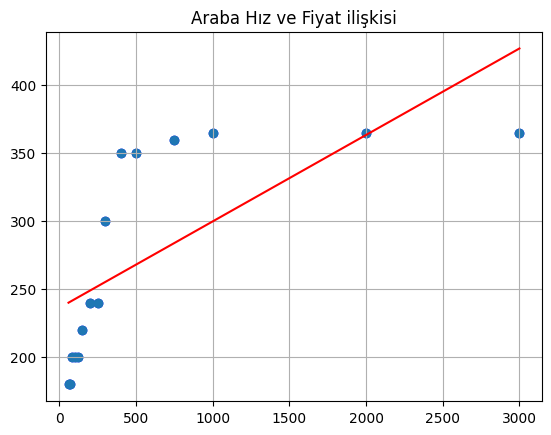

10 milyon TL'lik araba hizi tahmini:  [[871.66401826]]


In [6]:
# Tahmin
test = lr.predict(x)

plt.scatter(x, y, c = 'b')
plt.plot(x, test, c = 'r')
plt.scatter(x, y)
plt.xlable = ("Hız")
plt.ylable = ("Fiyat")
plt.title("Araba Hız ve Fiyat ilişkisi")
plt.grid(True)
plt.show()

araba_fiyati = 10000
print("10 milyon TL'lik araba hizi tahmini: ", lr.predict((np.array([araba_fiyati])).reshape(1, -1)))

In [7]:
# Polinomsal Özellikler
polinom_regresyon = PolynomialFeatures(degree = 4) # 4. dereceden polinom

x_polinom = polinom_regresyon.fit_transform(x)
x_polinom
# Çıktırlar formüle göre yani y = b0 + b1*x + b2*x^2 ... bn*x^n

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [13]:
# polinomsal regresyon eğitebilmek için polinomsal özellikler ile

# Burada UNUTMA!! artık elimzdeki veri tek satırlı değil çünkü dereceyi 4 yaptık yukarıda bu yüzden:
# b0 + b1*x ... gibi toplamda 5 satırlı değer var elimzde polinomsal olduğu için bu yüzden bizim doğrusal regresyonu bu çok boyutlu
# arraya göre fit etmemiz gerekiyor çünkü bu satırlar ve tek sütündan oluşmuyor sütünlardan oluşuyor
lr2 = LinearRegression()
lr2.fit(x_polinom, y)

LinearRegression()

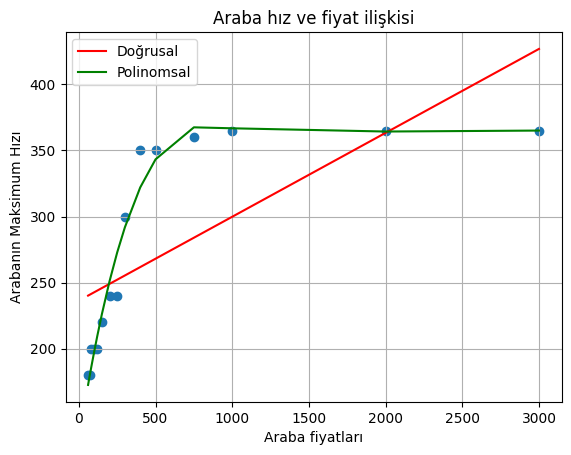

In [14]:
test2 = lr2.predict(x_polinom)

plt.scatter(x,y)
plt.plot(x, test, c='r', label = 'Doğrusal')
plt.plot(x, test2, c='g', label = 'Polinomsal')
plt.legend()
plt.ylabel('Arabanın Maksimum Hızı')
plt.xlabel('Araba fiyatları')
plt.title('Araba hız ve fiyat ilişkisi')
plt.grid(True)
plt.show()